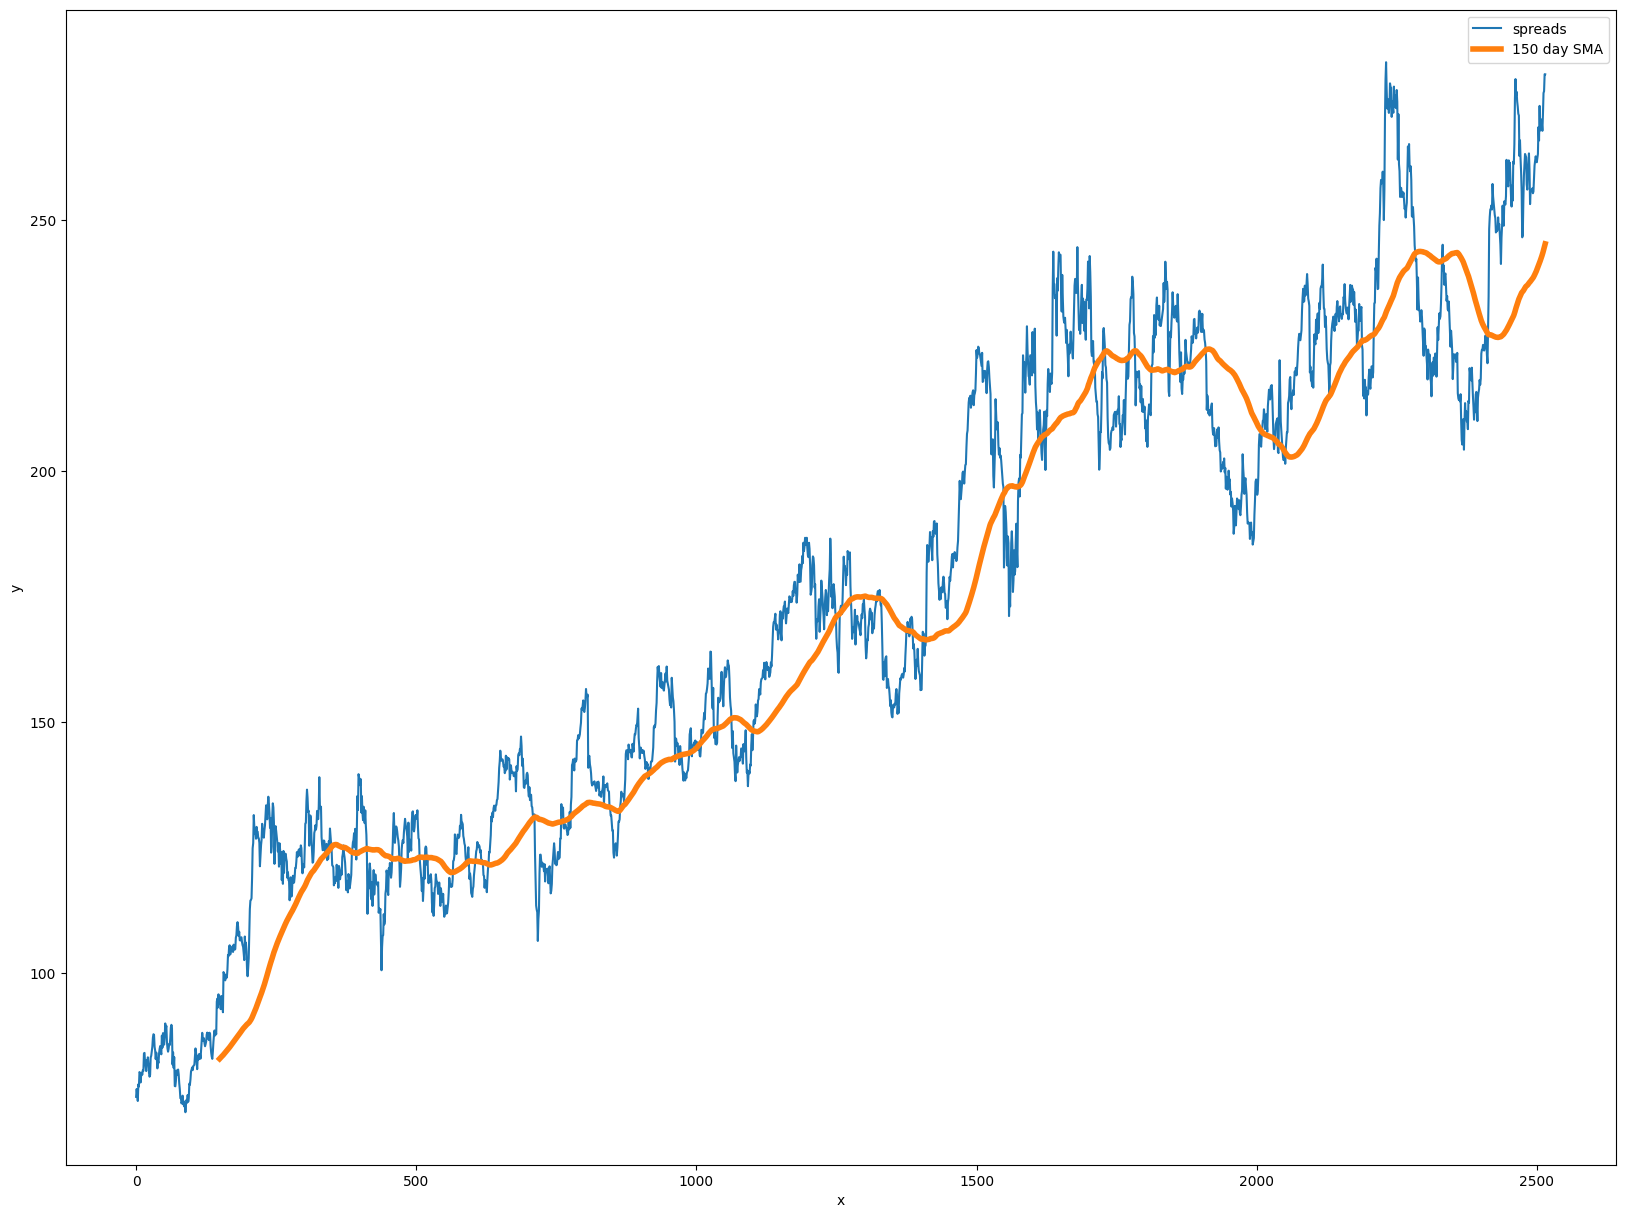

In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_BASE = '../data/nasdaq/'
TICKER_BASE = 'AMGN'
TICKER_AUX = 'VOD'

base_path = os.path.join(DATA_BASE, TICKER_BASE + '.pkl')
aux_path = os.path.join(DATA_BASE, TICKER_AUX + '.pkl')

base = pd.read_pickle(base_path)
aux = pd.read_pickle(aux_path)
spreads = base - aux

n = 150

sma = spreads.rolling(window=n).mean()

df = pd.DataFrame({
    'x': spreads.index.to_list(),
    'y': spreads[0],
    'sma': sma[0]
})

plt.figure(figsize=(20, 15))
sns.lineplot(data=df, x='x', y='y', label='spreads')
sns.lineplot(data=df, x='x', y='sma', linewidth=4, label='150 day SMA')
plt.show()